# **HISTORICAL PRECIPITATION EAS 1961-1990**
- using netcdf
- one map per model and multimodel mean map
- timeseries 

In [1]:
# Library for handling multi-dimensional data (lat, lon, time, etc.)
import xarray as xr
# Library for general handling of arrays
import numpy as np
# Library for handling cartographic projections
import cartopy.crs as ccrs
# Library for listing files in a directory
from os import listdir
# Library for plotting
import matplotlib.pyplot as plt

In [2]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=40, memory_limit="20GB", threads_per_worker=1, processes=True, dashboard_address=":8071")
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8071/status,
Dashboard: http://127.0.0.1:8071/status,Workers: 40
Total threads: 40,Total memory: 745.06 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35655,Workers: 40
Dashboard: http://127.0.0.1:8071/status,Total threads: 40
Started: Just now,Total memory: 745.06 GiB
Comm: tcp://127.0.0.1:45069,Total threads: 1
Dashboard: http://127.0.0.1:41729/status,Memory: 18.63 GiB
Nanny: tcp://127.0.0.1:39937,


In [3]:
lat_bot_eas = 20
lat_top_eas = 53
lon_west_eas = 80
lon_east_eas = 133

# MRI-ESM2-0

In [4]:
ensemble_members = []
for i in range(1, 11):
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths, chunks= {'time': -1,'lat': 40,'lon': 80})['pr']
    ensemble_members.append(pr)
mri_historical_pr = xr.concat(ensemble_members, dim='member')
mri_historical_pr = mri_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in range(1, 11)])

mri_historical_pr_1961_1990 = mri_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
#mri_historical_pr_1961_1990.compute()

/tmp/ipykernel_352516/615440209.py:5: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 40. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks= {'time': -1,'lat': 40,'lon': 80})['pr']
/tmp/ipykernel_352516/615440209.py:5: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 80. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks= {'time': -1,'lat': 40,'lon': 80})['pr']
/tmp/ipykernel_352516/615440209.py:5: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 40. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks= {'time': -1,'lat': 40,'lon': 80})['pr']
/tmp/ipykernel_352516/615440209.py:5: UserWarning: The specified chunks separate the stored chunks alon

In [5]:
mri_historical_pr_1961_1990_mm_day = (mri_historical_pr_1961_1990 * 86400)
mri_historical_pr_1961_1990_mm_day.attrs["units"] = "mm day-1"

In [6]:
mri_historical_pr_1961_1990_mm_day_eas = mri_historical_pr_1961_1990_mm_day.sel(lat=slice(lat_bot_eas, lat_top_eas),lon=slice(lon_west_eas, lon_east_eas))

In [7]:
mri_historical_pr_1961_1990_mm_day_eas_ave = (mri_historical_pr_1961_1990_mm_day_eas.mean('time'))
mri_mean_eas = (mri_historical_pr_1961_1990_mm_day_eas_ave.mean(dim='member'))
mri_mean_eas = mri_mean_eas.compute()

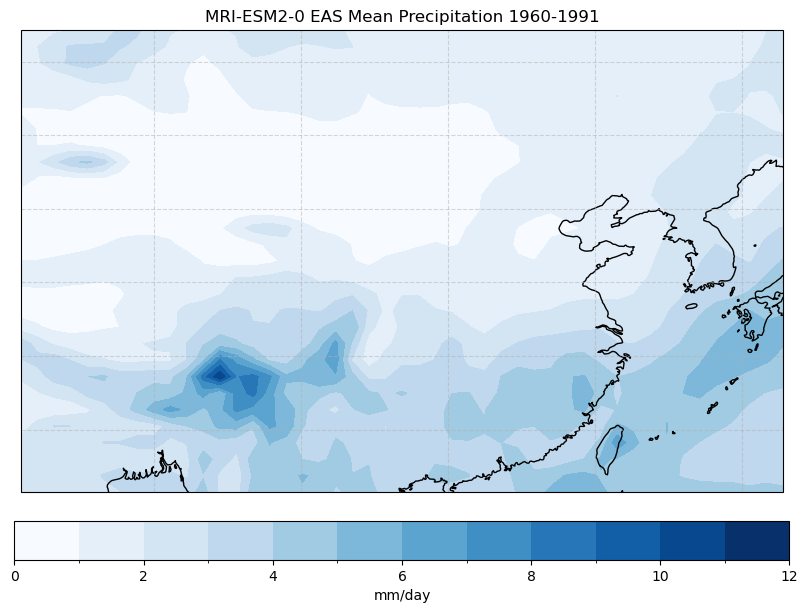

In [8]:
#mri model averaged time 1961-1990, averaged across all members
data = mri_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,12,13),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("MRI-ESM2-0 EAS Mean Precipitation 1960-1991")
plt.show()

In [9]:
mri_mean_eas.to_netcdf('mri_historical_1961_1990_eas.nc')

# NorESM2-LM

In [10]:
ensemble_members = []
for i in range(1, 4):
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/NorESM2-LM/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 24, 'lon': 36})['pr']
    ensemble_members.append(pr)
noresm_historical_pr = xr.concat(ensemble_members, dim='member')
noresm_historical_pr = noresm_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in range(1, 4)])

noresm_historical_pr_1961_1990 = noresm_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
#noresm_historical_pr_1961_1990.compute()

/tmp/ipykernel_352516/2316872611.py:5: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 24. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 24, 'lon': 36})['pr']
/tmp/ipykernel_352516/2316872611.py:5: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 36. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 24, 'lon': 36})['pr']
/tmp/ipykernel_352516/2316872611.py:5: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 24. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 24, 'lon': 36})['pr']
/tmp/ipykernel_352516/2316872611.py:5: UserWarning: The specified chunks separate the stored chun

In [11]:
noresm_historical_pr_1961_1990_mm_day = (noresm_historical_pr_1961_1990 * 86400)
noresm_historical_pr_1961_1990_mm_day.attrs["units"] = "mm day-1"

noresm_historical_pr_1961_1990_mm_day_eas = noresm_historical_pr_1961_1990_mm_day.sel(lat=slice(lat_bot_eas, lat_top_eas),lon=slice(lon_west_eas, lon_east_eas))


noresm_historical_pr_1961_1990_mm_day_eas_ave = (noresm_historical_pr_1961_1990_mm_day_eas.mean('time'))
noresm_mean_eas = (noresm_historical_pr_1961_1990_mm_day_eas_ave.mean(dim='member'))
noresm_mean_eas = noresm_mean_eas.compute()


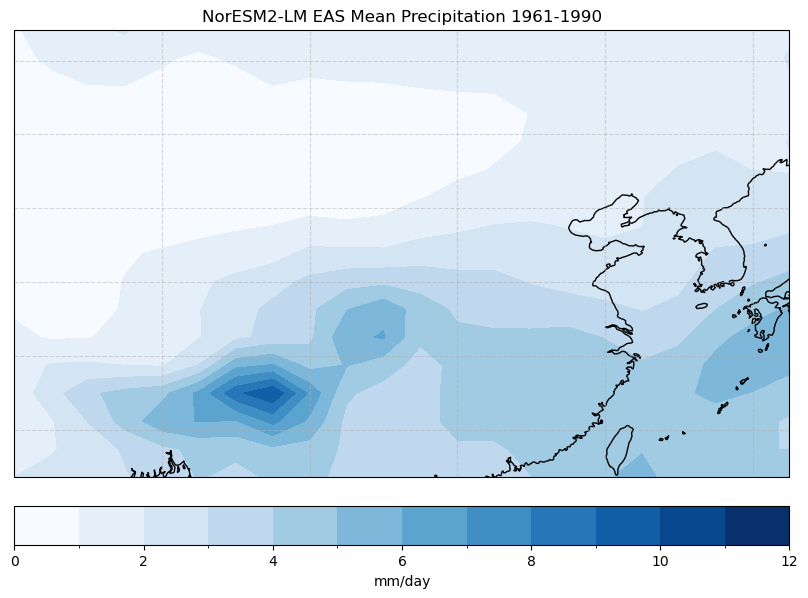

In [12]:
#noresm model averaged time 1961-1990, averaged across all members
data = noresm_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,12,13),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("NorESM2-LM EAS Mean Precipitation 1961-1990")
plt.show()

# CESM2

In [13]:
ensemble_members = []
for i in range(1, 11):
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/CESM2/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 48, 'lon': 72})['PRECT']
    ensemble_members.append(pr)
cesm2_historical_pr = xr.concat(ensemble_members, dim='member')
cesm2_historical_pr = cesm2_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in range(1, 11)])

cesm2_historical_pr_1961_1990 = cesm2_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
#cesm2_historical_pr_1961_1990.compute()

/tmp/ipykernel_352516/348962478.py:5: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 48. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 48, 'lon': 72})['PRECT']
/tmp/ipykernel_352516/348962478.py:5: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 72. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 48, 'lon': 72})['PRECT']
/tmp/ipykernel_352516/348962478.py:5: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 48. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 48, 'lon': 72})['PRECT']
/tmp/ipykernel_352516/348962478.py:5: UserWarning: The specified chunks separate the stored

In [14]:
cesm2_historical_pr_1961_1990_mm_day = (cesm2_historical_pr_1961_1990 * 86400 * 1000)
cesm2_historical_pr_1961_1990_mm_day.attrs["units"] = "mm day-1"

cesm2_historical_pr_1961_1990_mm_day_eas = cesm2_historical_pr_1961_1990_mm_day.sel(lat=slice(lat_bot_eas, lat_top_eas),lon=slice(lon_west_eas, lon_east_eas))

cesm2_historical_pr_1961_1990_mm_day_eas_ave = (cesm2_historical_pr_1961_1990_mm_day_eas.mean('time'))
cesm2_mean_eas = (cesm2_historical_pr_1961_1990_mm_day_eas_ave.mean(dim='member'))
cesm2_mean_eas = cesm2_mean_eas.compute()


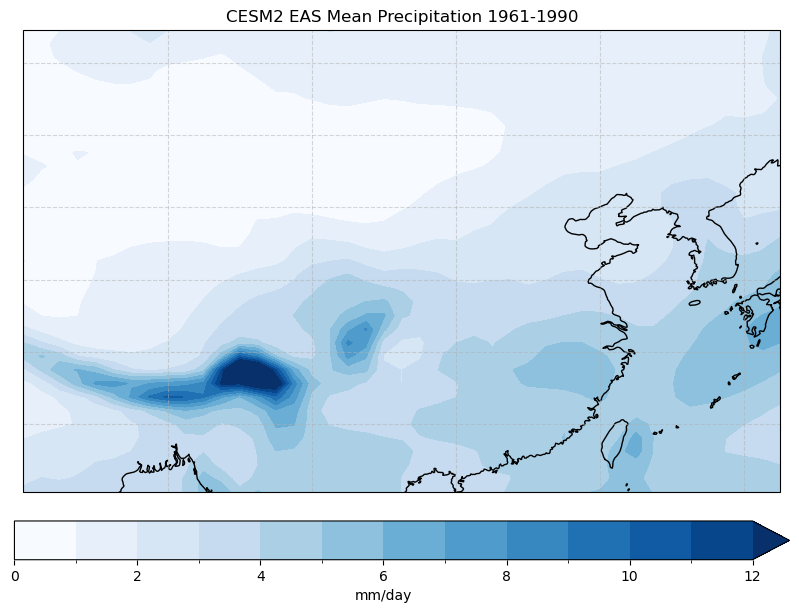

In [15]:
#cesm2 model averaged time 1961-1990, averaged across all members
data = cesm2_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,12,13),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("CESM2 EAS Mean Precipitation 1961-1990")
plt.show()

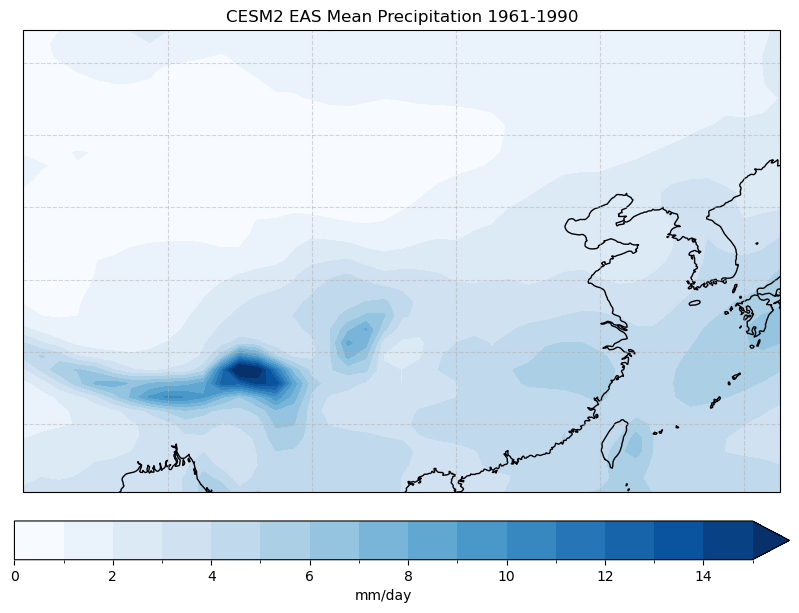

In [16]:
#cesm2 model averaged time 1961-1990, averaged across all members
data = cesm2_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,15,16),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("CESM2 EAS Mean Precipitation 1961-1990")
plt.show()

# EC-Earth3-AerChem

In [17]:
ensemble_members = []
existing_members = [1, 3, 4]
for i in existing_members:
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/EC-Earth3-AerChem/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths, chunks={'time': -1,'lat': 64, 'lon': 128})['pr']
    ensemble_members.append(pr)
ec_historical_pr = xr.concat(ensemble_members, dim='member')
ec_historical_pr = ec_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in existing_members])

ec_historical_pr_1961_1990 = ec_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
#ec_historical_pr_1961_1990.compute()

/tmp/ipykernel_352516/4147294063.py:6: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 64. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1,'lat': 64, 'lon': 128})['pr']
/tmp/ipykernel_352516/4147294063.py:6: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 128. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1,'lat': 64, 'lon': 128})['pr']
/tmp/ipykernel_352516/4147294063.py:6: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 64. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1,'lat': 64, 'lon': 128})['pr']
/tmp/ipykernel_352516/4147294063.py:6: UserWarning: The specified chunks separate the stored chu

In [18]:
ec_historical_pr_1961_1990_mm_day = (ec_historical_pr_1961_1990 * 86400)
ec_historical_pr_1961_1990_mm_day.attrs["units"] = "mm day-1"

ec_historical_pr_1961_1990_mm_day_eas = ec_historical_pr_1961_1990_mm_day.sel(lat=slice(lat_bot_eas, lat_top_eas),lon=slice(lon_west_eas, lon_east_eas))

ec_historical_pr_1961_1990_mm_day_eas_ave = (ec_historical_pr_1961_1990_mm_day_eas.mean('time'))
ec_mean_eas = (ec_historical_pr_1961_1990_mm_day_eas_ave.mean(dim='member'))
ec_mean_eas = ec_mean_eas.compute()


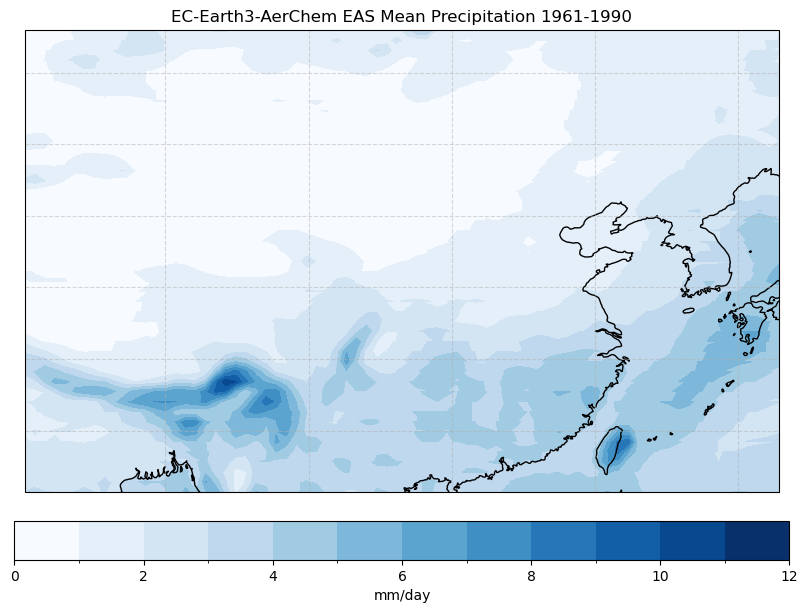

In [19]:
#ec model averaged time 1961-1990, averaged across all members
data = ec_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,12,13),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("EC-Earth3-AerChem EAS Mean Precipitation 1961-1990")
plt.show()

In [20]:
# Historical
mri_mean_eas = mri_mean_eas.compute()  # Add the = assignment
noresm_mean_eas = noresm_mean_eas.compute()
cesm2_mean_eas = cesm2_mean_eas.compute()
ec_mean_eas = ec_mean_eas.compute()

# Save
mri_mean_eas.to_netcdf('mri_historical_1961_1990_eas.nc')
noresm_mean_eas.to_netcdf('noresm_historical_1961_1990_eas.nc')
cesm2_mean_eas.to_netcdf('cesm_historical_1961_1990_eas.nc')
ec_mean_eas.to_netcdf('ec_historical_1961_1990_eas.nc')

# MULTIMODEL MEAN EAS

In [21]:
# Pick one model's grid as reference 
target_grid = noresm_mean_eas  # coursest model

# Regrid all others to match
noresm_regridded = noresm_mean_eas
mri_regridded = mri_mean_eas.interp(lat=target_grid.lat, lon=target_grid.lon)
cesm2_regridded = cesm2_mean_eas.interp(lat=target_grid.lat, lon=target_grid.lon)
ec_regridded = ec_mean_eas.interp(lat=target_grid.lat, lon=target_grid.lon)

model_means = [mri_regridded, noresm_regridded, cesm2_regridded, ec_regridded]
all_models = xr.concat(model_means, dim='model')
all_models = all_models.assign_coords(model=['MRI-ESM2-0', 'NorESM2-LM', 'CESM2', 'EC-Earth3-AerChem'])
multimodel_mean = all_models.mean(dim='model')

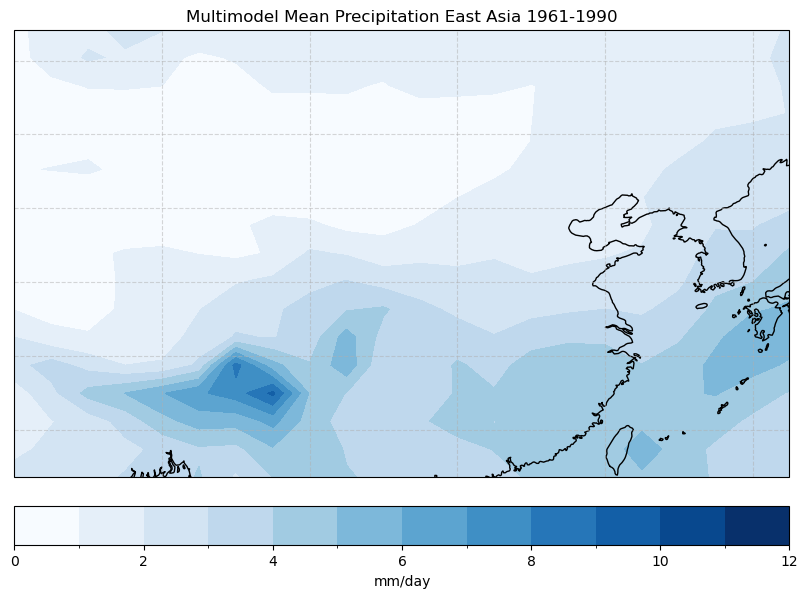

In [22]:
#plotting multimodel mean historical pr 1961-1990 for East Asia
data = multimodel_mean


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,12,13),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)

ax.set_title("Multimodel Mean Precipitation East Asia 1961-1990")
plt.show()


In [23]:
multimodel_mean.to_netcdf('multimodel_historical_1961_1990_eas.nc')

# TIMESERIES

In [24]:
def weighted_spatial_mean(data):
    # ref: https://docs.xarray.dev/en/latest/examples/area_weighted_temperature.html

    # assign weights depending on latitude
    weights = np.cos(np.deg2rad(data.lat))
    # give the weights a name
    weights.name = "weights"
    # let the data know about the weights
    data_weighted = data.weighted(weights)
    # take the weighted spatial mean
    data_weighted_mean = data_weighted.mean(("lon", "lat"))
    return data_weighted_mean

In [25]:
#pulling out variables for historical pr in mm/day already sliced to EAS domain and getting ensemble means without averaging time
mri_mean_member_ave = mri_historical_pr_1961_1990_mm_day_eas.mean(dim='member')
noresm_mean_member_ave = noresm_historical_pr_1961_1990_mm_day_eas.mean(dim='member')
cesm2_mean_member_ave = cesm2_historical_pr_1961_1990_mm_day_eas.mean(dim='member')
ec_mean_member_ave = ec_historical_pr_1961_1990_mm_day_eas.mean(dim='member')

#averaging over space
mri_space_ave = weighted_spatial_mean(mri_mean_member_ave)
noresm_space_ave = weighted_spatial_mean(noresm_mean_member_ave)
cesm2_space_ave = weighted_spatial_mean(cesm2_mean_member_ave)
ec_space_ave = weighted_spatial_mean(ec_mean_member_ave)

In [26]:
def fix_time(data):
    """Convert cftime to datetime64 using xarray's convert_calendar"""
    if data.time.dtype == 'object':
        # Use xarray's convert_calendar for cftime objects
        data = data.convert_calendar('standard', use_cftime=False)
    return data

mri_space_ave = fix_time(mri_space_ave).compute()
noresm_space_ave = fix_time(noresm_space_ave).compute()
cesm2_space_ave = fix_time(cesm2_space_ave).compute()
ec_space_ave = fix_time(ec_space_ave).compute()

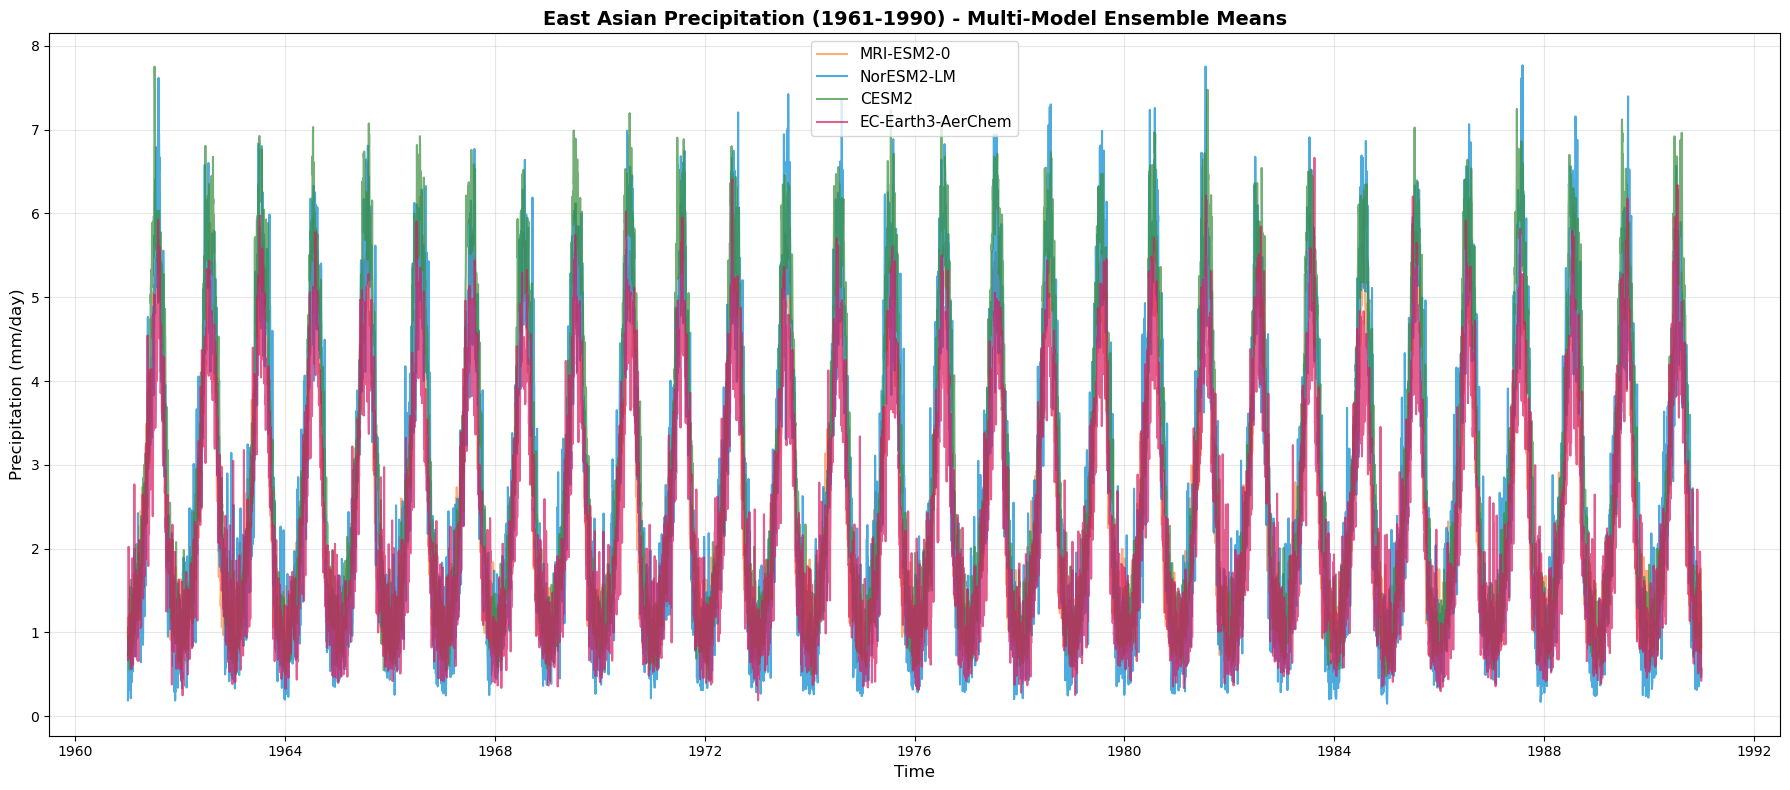

In [27]:
#individual model mean timeseries
fig, ax = plt.subplots(figsize=(18, 8))

mri_space_ave.plot(ax=ax, label='MRI-ESM2-0', color='#FF8C42', linewidth=1.5, alpha = 0.7)
noresm_space_ave.plot(ax=ax, label='NorESM2-LM', color='#0288D1', linewidth=1.5, alpha = 0.7)
cesm2_space_ave.plot(ax=ax, label='CESM2', color='#388E3C', linewidth=1.5, alpha = 0.7)
ec_space_ave.plot(ax=ax, label='EC-Earth3-AerChem', color='#D81B60', linewidth=1.5, alpha = 0.7)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Precipitation (mm/day)', fontsize=12)
ax.set_title('East Asian Precipitation (1961-1990) - Multi-Model Ensemble Means', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

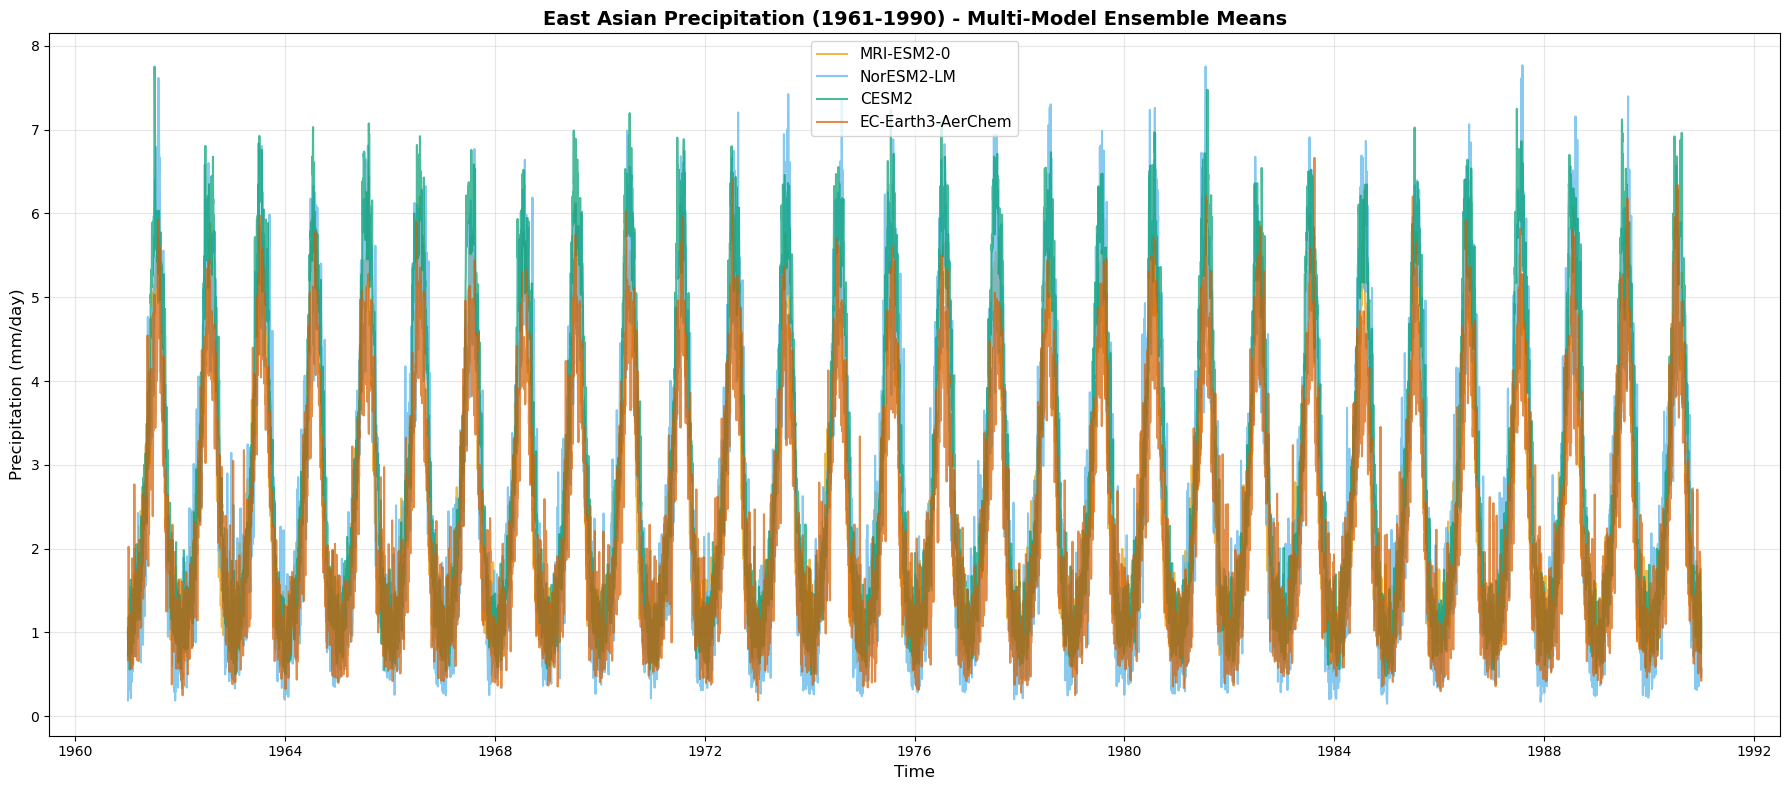

In [28]:
fig, ax = plt.subplots(figsize=(18, 8))

mri_space_ave.plot(ax=ax, label='MRI-ESM2-0', color='#E69F00', linewidth=1.5, alpha=0.7)      # Orange
noresm_space_ave.plot(ax=ax, label='NorESM2-LM', color='#56B4E9', linewidth=1.5, alpha=0.7)   # Sky blue
cesm2_space_ave.plot(ax=ax, label='CESM2', color='#009E73', linewidth=1.5, alpha=0.7)         # Teal/green
ec_space_ave.plot(ax=ax, label='EC-Earth3-AerChem', color='#D55E00', linewidth=1.5, alpha=0.7) # Vermillion/red

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Precipitation (mm/day)', fontsize=12)
ax.set_title('East Asian Precipitation (1961-1990) - Multi-Model Ensemble Means', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
model_timeseries = [mri_space_ave, noresm_space_ave, cesm2_space_ave, ec_space_ave]
all_model_timeseries = xr.concat(model_timeseries, dim='model')
all_model_timeseries = all_model_timeseries.assign_coords(model=['MRI-ESM2-0', 'NorESM2-LM', 'CESM2', 'EC-Earth3-AerChem'])
multimodel_timeseries = all_model_timeseries.mean(dim='model')

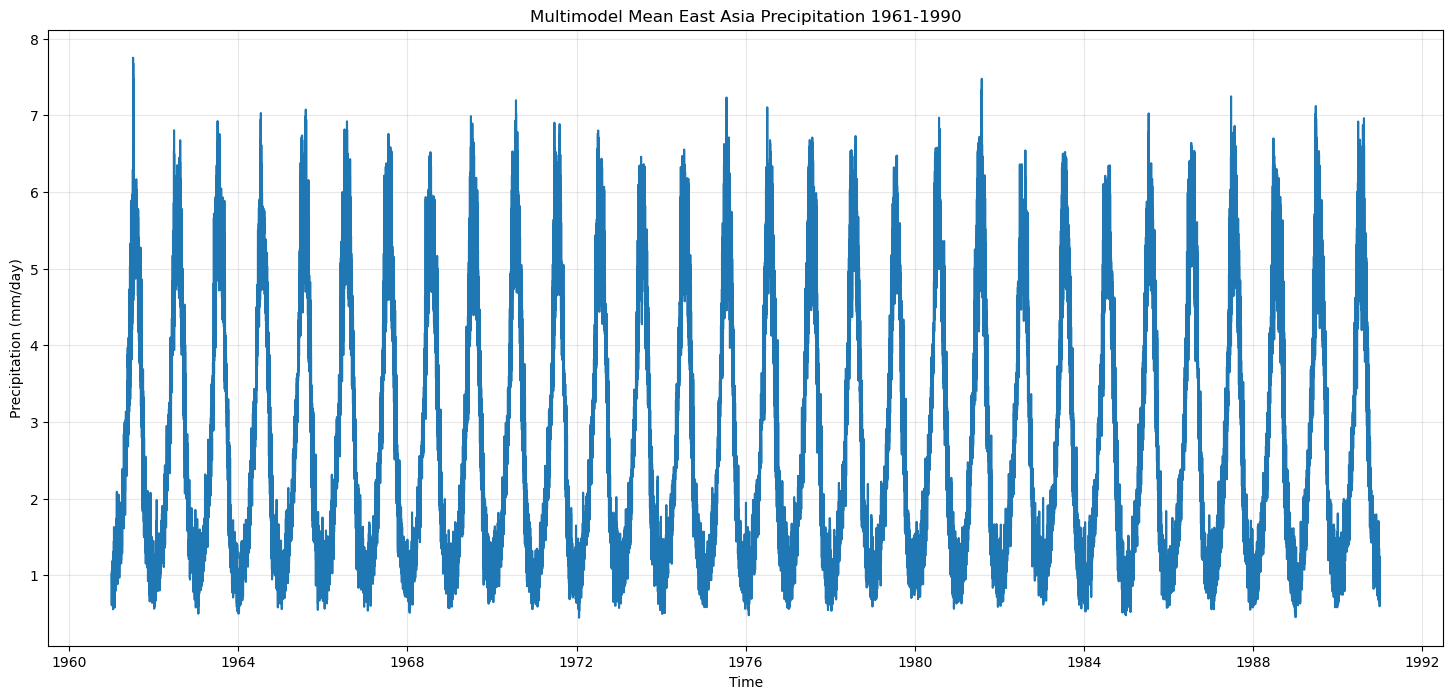

In [30]:
plt.figure(figsize=[18, 8])
multimodel_timeseries.plot()
plt.title('Multimodel Mean East Asia Precipitation 1961-1990')
plt.ylabel('Precipitation (mm/day)')
plt.xlabel('Time')
plt.grid(True, alpha=0.3)
plt.show()